# 12-778 Fall 2022: Assignment #1

Mario Bergés

## Instructions

When answering the following questions, please provide all of your
calculations to arrive at the answer (in addition to the answer itself).
Your calculations should be very clear and easy to understand. They
should include your assumptions, and a step-by-step explanation of how
you arrived at the solution. Also, make sure you type your name and
AndrewID somewhere on the first page, and that you clarify who you
worked with in developing the intuitions behind your answer.

Some other recommendations:

-   Before finding the answer to each question or looking at the next
    step in the solution, take some time to think about how you can come
    up with this on your own.
-   Again, make sure you document everything you do, and not just write
    down the answer to the question. This will both help during grading
    as well as improving your learning process.
-   Do not write down any solution or process that you do not
    understand. If you feel that you do not understand how to do
    something, seek some help. The preferred method for this is to post
    your questions on the discussion board for the course (i.e.,
    Piazza).

## What are sensors? (5%)

Pick an analog sensor from an online provider (one that you can easily
purchase and would be interested in understanding better for your final
project) and answer the following questions:

1.  What are the potential applications for this sensor? Describe two.
2.  How does this sensor operate, physically? In other words, how does
    the sensor transform energy in the physical phenomenon being
    measured into an electrical signal?
3.  What is this sensor’s accuracy? What is its transfer function? What
    other static and/or dynamic properties are worth discussing?
4.  When considering the specific application that you have in mind,
    what are the advantages and disadvantages of this specific sensor
    compared to other alternative sensing technologies for the same
    physical stimulus?
5.  How much does it cost, and where can you buy it?
6.  What kind of interface circuit would be needed to connect it to your
    Raspberry Pi Pico W? Please sketch the circuit.

## Working with sensors and your RPi Pico W (10%)

The ADC in your RPi Pico W has 3 available channels for you to supply
whatever inputs you like, but there is a fourth channel that is directly
connected to an on-board temperature sensor. You can easily access this
fourth channel in the same way that you do the other three, but you
won’t need to connect any analgo sensor to it as it is hard-wired to the
temperature sensor. Can you leverage the information on the [Raspberry
Pi Pico Python
SDK](https://datasheets.raspberrypi.com/pico/raspberry-pi-pico-python-sdk.pdf)
(specifically, page 14) to interface with this sensor and answer the
following questions?

1.  What is the sensor’s transfer function?
2.  Why do we need to take the ADC measurements and divide them by
    65535? Why do we multiply them by 3.3?
3.  Create a Pico program that allows you to collect temperature data
    for a 10 minute interval, at 1s resolution.
4.  Estimate the memory footprint of the data that you will collect
    using this program.
5.  Collect data for 10 minutes and save it (either locally, or
    remotely). What is the file size? Compare it with the estimated
    memory footprint in the last question and comment on this.

## Harmonic Oscillators (10%)

In class we discussed dynamic characteristics of sensors by looking into
the response of single degree of freedom systems to harmonic loading.
Unfortunately, we did not have enough time to solve the equations of
motion for the damped forced oscillator case, or to play around with the
resulting solutions. Thus, for this task, and to make sure the concepts
are more intuitive to you, I ask that you play with a simulated harmonic
oscillator, borrowed and later modified from
[here](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Harmonic_Oscillator.html).

The problem is defined as finding the solutions to the following
differential equation:

$$\ddot{x} + c \dot{x} + k x = \frac{F(t)}{m}$$

or, if we know that $\omega_0 = \sqrt{\frac{k}{m}}$, which is the
angular frequency of the oscillator when undamped; and
$\zeta = \frac{c}{2\sqrt{mk}}$ is the so-called damping ratio, we can
rewrite it as such:

$$\ddot{x} + 2 \zeta \omega_0 \dot{x} + {\omega_0}^2 x = \frac{F(t)}{m}$$

We will start with the case where
$\frac{F(t)}{m} = F_m sin(\omega_d t)$, i.e. the oscillator is driven by
a sinusoidal force of amplitude $F_m$ and frequency $\omega_d$.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw


def ode(X, t, zeta, omega0):
    """
    Free Harmonic Oscillator ODE
    """
    x, dotx = X
    ddotx = -2*zeta*omega0*dotx - omega0**2*x
    return [dotx, ddotx]

def odeDrive(X, t, zeta, omega0, omegad_omega0):
    """
    Driven Harmonic Oscillator ODE
    """
    x, dotx = X
    omegad = omegad_omega0 * omega0
    ddotx = -2*zeta*omega0*dotx - omega0**2*x + F_m * np.sin(omegad * t)
    return [dotx, ddotx]

def update(zeta = 0.05, omega0 = 2.*np.pi, omegad_omega0 = 1.): 
    """
    Update function.
    """
    #zeta = c/(2.*np.sqrt(m*k))
    #omega0 = np.sqrt(k/m)
    #omegad_omega0 = omegad/omega0
    X0 = np.zeros(2)
    sol = integrate.odeint(odeDrive, X0, t, args = (zeta, omega0, omegad_omega0))
    line0.set_ydata(sol[:, 0])
    fig.canvas.draw()
    fig.canvas.flush_events()

Nt = 1000
F_m = 1.
t = np.linspace(0., 10., Nt)
dummy = np.zeros_like(t)
fig = plt.figure()
line0, = plt.plot(t, dummy, label = "position")
plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()

ipw.interact(update, zeta = (0., .2, 0.01),
             omega0 = (2.*np.pi*0.5, 2.*np.pi*5, 2.*np.pi*0.01),
             omegad_omega0 = (0.1, 2., 0.05));

To start, take the code above and copy/paste it to a Jupyter Notebook so
that you can play around with the interactive interface that it
provides. Currently, the interface is set up to allow you to set three
parameters, namely $\zeta$, $\omega_0$ and $\frac{\omega_d}{\omega_0}$.
That said, it is relatively easy to change the interface so that you can
directly alter $c$, $m$, $k$ and $\omega_d$. Your task is to leverage
the interactive interface and get familiarized with the response of the
system as you change the damping, stiffness, mass and frequency of the
harmonic loading. Try answering these questions for yourself:

1.  What is the relationship between the amplitude and frequency of the
    harmonic loading, and the amplitude and frequency of the system’s
    response?
2.  What happens when you drive the system at the resonant frequency?

Once you are done, please write a brief summary of your overall findings
(2 or 3 paragraphs of thoughts, not just about the last few questions)
as your answer to this part of the assignment.

## Circuit Analysis (25%)

### Task a (10%)

If you think carefully about what we’ve learned about complex impedances
and how they work in AC circuits, you’ll quickly realize that almost any
component in your system can be seen as a filter. It may not be evident,
but even the wire you are using to connect components together, itself,
can act as a filter. Let’s explore that a bit.

Virtually all cables have a very small, but detectable capacitance. This
is because the insulation material around each of the wires closing the
circuit acts as a dielectric and can accumulate charge when a voltage is
present.

<figure>
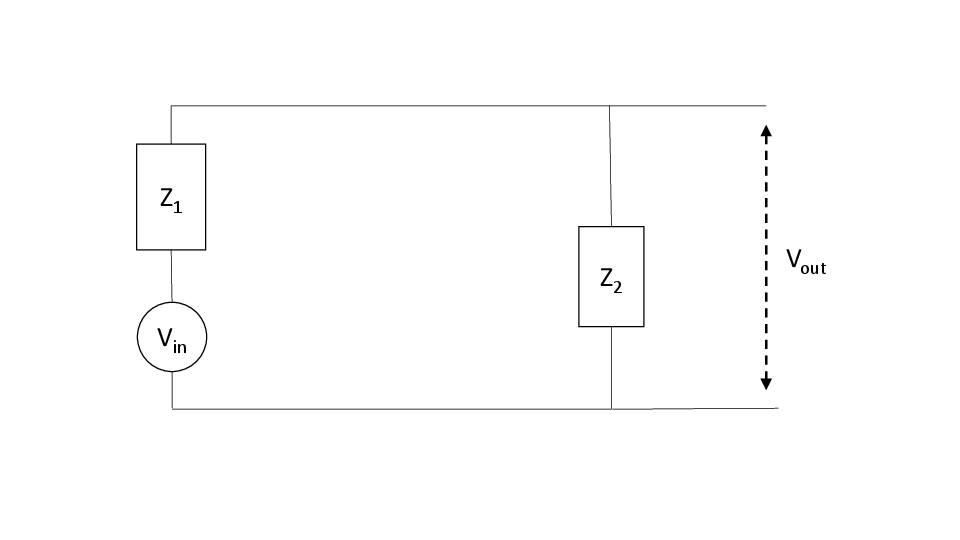
<figcaption aria-hidden="true">Figure 1: Simple circuit generalizing the
effect of cable resistance and capacitance.</figcaption>
</figure>

[Figure 1](#fig-voltage-divider) shows a diagram of how this works out
in practice. If, for example, we had an ideal microphone as the voltage
source ($V_{in}$) in this circuit, and wanted to measure the signal
coming out ($V_{out}$), we would find that the values of $Z_1$ and
$Z_2$, namely the resistance and capacitance of the cable itself, would
influence the signal we receive.

To study the effect of this filter, let’s analyze the ratio of the
magnitudes for $V_{in}$ and $V_{out}$. In other words, let’s study how
the voltage we measure is related to the voltage being supplied by the
microphone, as described below:

$$\frac{V_{out}}{V_{in}}$$

**Task a:** If $Z_1 = R$ and $Z_2 = \frac{1}{j\omega C}$, where $C$ is
the capacitance of the cable, and $R$ is the resistance, then what is
the expression for $\frac{V_{out}}{V_{in}}$?

**Task b:** The capacitance of the wire (as well as the resistance)
increase with its length $l$. In other words, $C \propto l$ and
$R \propto l$. What will happen to the dynamic properties of the
measured signal from a microphone as we increase the length of the wire?

### Task b (5%)

<figure>
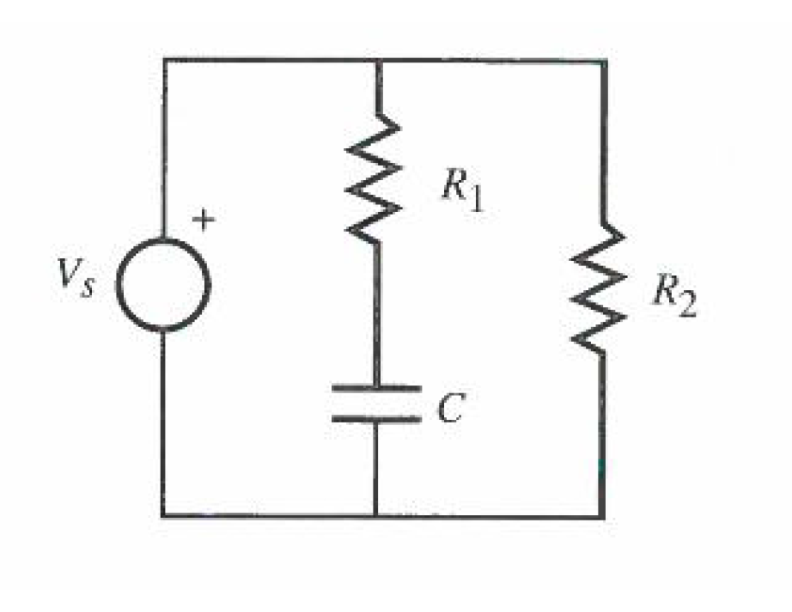
<figcaption aria-hidden="true">Figure 2: Simple DC circuit</figcaption>
</figure>

For the circuit in [Figure 2](#fig-circuits-2), find the steady-state
voltage across $R_1$, $R_2$ and $C$, if $V_s = 10$ V DC, $R_1 = 1$
k$\Omega$, $R_2 = 1$ k$\Omega$ and $C = 0.01 \mu$F.

### Task c (10%)

Solve Exercise 2.24 from Chapter 2 (Analyis of Circuits) from
Instrumentation for Engineering Measurements by Dally, Riley and
McConnell.

## Impedance (20%)

In chapter 2 of Fraden, Figure [Figure 3](#fig-fraden-2-15) shows up
(Figure 2.15 in the book):

<figure>
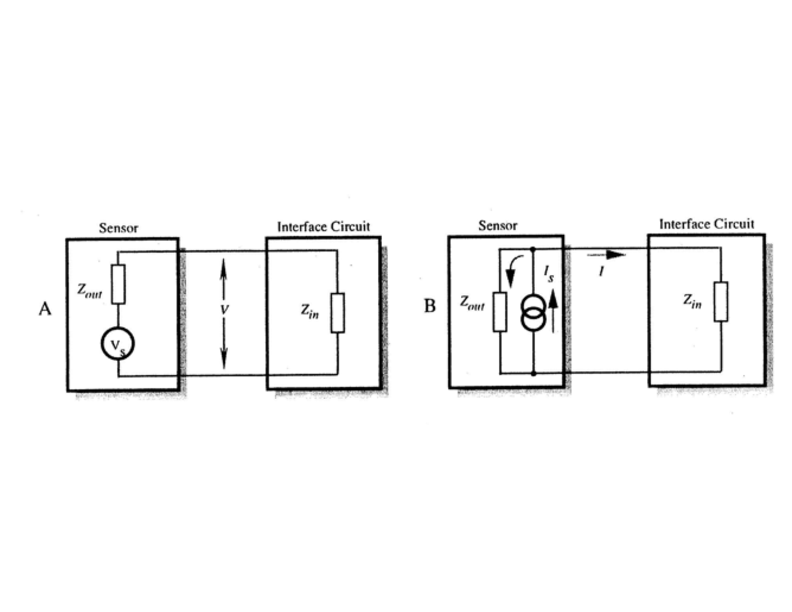
<figcaption aria-hidden="true">Figure 3: Sensor connections to an
interface circuit. (a) shows a sensor with voltage output, while (b)
shows a sensor with current output.</figcaption>
</figure>

**Task a:** The concept of impedance is very important for circuit
analysis. Please define, as best as you can (i.e., using technical
concepts and mathematical notation), what impedance is.

**Task b:** Impedance matching is also an important concept, as
described by Fraden in page 40 of Chapter 2. Can you explain why it is
recommended that a sensor with voltage output should have a much smaller
impedance ($Z_{out}$) compared to the impedance ($Z_{in}$) of the
interface circuit? (see [Figure 3](#fig-fraden-2-15) A). Why is it
different for [Figure 3](#fig-fraden-2-15) B?

**Task c:** Find a good video online explaining the concept of impedance
matching (one whose explanation you find intuitive and clear) and
provide the URL to that video as the answer to this question.

**Task d:** Compute the total impedance for the AC circuit shown in
Figure [Figure 4](#fig-circuit). Here, $v_s$ is an AC voltage source
(i.e., it is a time-varying source of voltage, varying as follows:
$v_s = v_i e^{j\omega t}$). The frequency of this AC source is $\omega$.
In the same circuit, $R$, $L$ and $C$ represent the resistance,
inductance and capacitance values for those circuit elements,
respectively.

<figure>
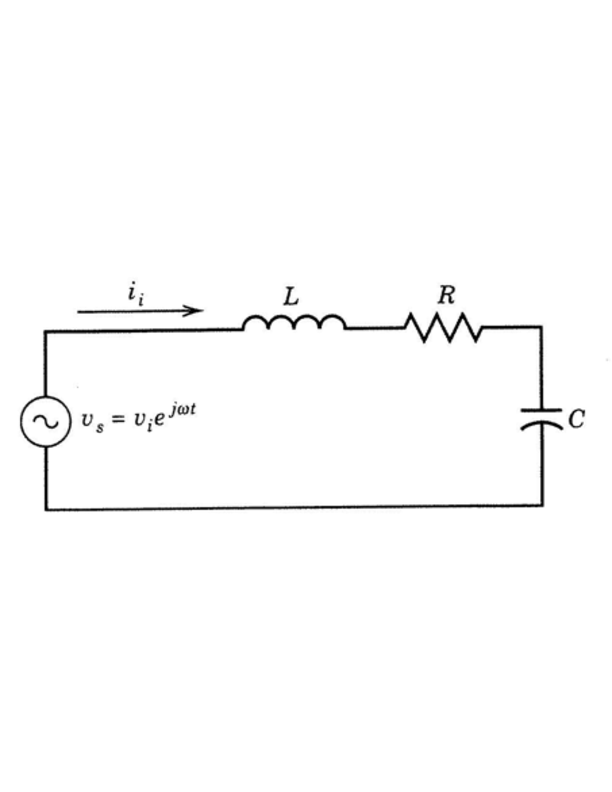
<figcaption aria-hidden="true">Figure 4: An AC circuit containing a
resistance, capacitance and inductance in series.</figcaption>
</figure>

## Analog-to-Digital Conversion (10%)

Suppose I set out to collect measurements about the voltage supplied by
the electrical utility company to my house house for a week. I happen to
know that the frequency of this voltage (in the US) is somehwere around
60Hz, but given that there is no guarantee it will maintain this
frequency, and also considering the fact that the signal is not
band-limited, I decide to over-sample.

**Task a:** Suppose I decide to sample it at 12 kHz with a 12-bit ADC.
If I collect measurements for an entire week, how much memory will I
need to store all of these samples?

**Task b:** Suppose now that I figure out a way to effectively make the
signal band-limited, and I can guarantee that all the signal content
will be below 70Hz. What would be a more efficient sampling rate in this
case? How much memory would I require in this case?

## Aliasing (10%)

In class, we learned why aliasing occurs and how it is related to the
sampling frequency (or the Nyquist frequency) of the data acquisition
configuration. Answer the following questions related to aliasing:

**Task a:** A 10Hz pure sine wave is sampled at 12 Hz. Compute the
maximum frequency that can be represented in the resulting discrete
signal. Compute the aliased frequency.

**Task b:** Assume that the measured signal is complex periodic of the
form
$y(t) = A_1 sin(2\pi 25t) + A_2 sin(2\pi 75t) + A_3 sin(2\pi 125t)$. If
this signal is sampled at 100Hz, determine the frequency content of the
resulting discrete response signal.

## Filters (10%)

A moving average is an filtering technique that can be applied to an
analog or digital signal. A moving average is based on the concept of
windowing as illustrated in [Figure 5](#fig-moving-average-a). The
portion of the signal that lies inside the window in averaged and the
average values are plotted as a function of time as the window moves
across the signal. A 10-point moving average of the signal is plotted as
well in [Figure 6](#fig-moving-average-b).

<figure>
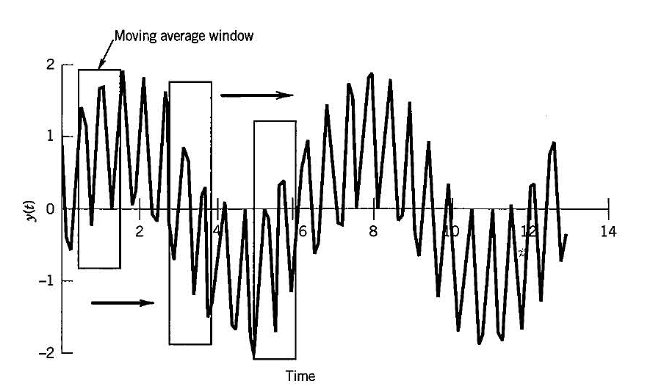
<figcaption aria-hidden="true">Figure 5: Moving averaging and
windowing</figcaption>
</figure>

<figure>
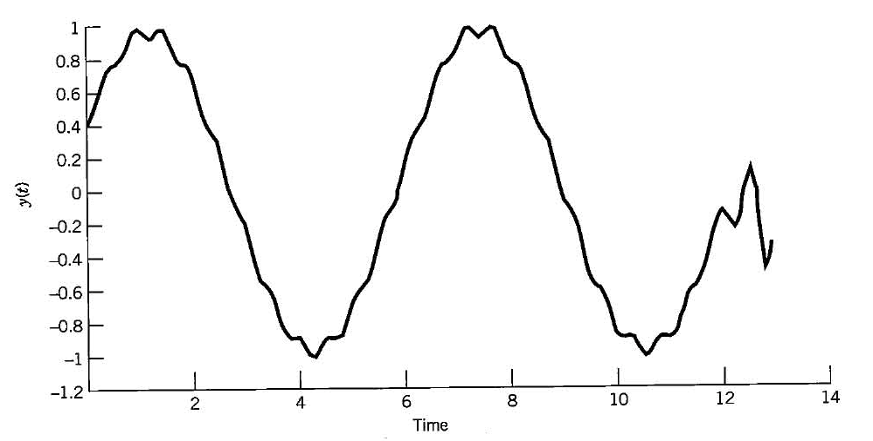
<figcaption aria-hidden="true">Figure 6: Effect of moving average on the
signal.</figcaption>
</figure>

**Task a:** Discuss the effects of employing a moving average on the
signal depicted in [Figure 5](#fig-moving-average-a). In particular,
discuss the changes imparted to the dynamic characteristics of the
signal. What does this say about the the transfer function for the
moving average filter?

**Task b:** Develop a simple Python program that computes the moving
average for the following signal: $y(t) = sin(5t) + cos(11t)$,
discretized by applying a 0.05second sampling train. Examine the effects
of chaning the averaging window size from 4 to 30 samples.

**Task c:** What did you learn about the effects of the widht (number of
samples) for the averaging window?